<a href="https://colab.research.google.com/github/shubhamk16/Deep_learning/blob/master/Face%20swap%20with%20dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create simple memes in seconds with Python, Dlib, and OpenCV
---
- https://github.com/nicolasmetallo/eameo-faceswap-generator
- Inspired by the work of: https://github.com/spmallick/


## Install Dlib

In [3]:
# install dlib (will take 10 or more minutes)
!apt update
!apt install -y cmake
!pip install dlib

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,857 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main amd64 Packages [896 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 

## Clone repository and cd into it

In [4]:
# clone repo
!git clone https://github.com/nicolasmetallo/eameo-faceswap-generator

Cloning into 'eameo-faceswap-generator'...
remote: Enumerating objects: 266, done.
remote: Total 266 (delta 0), reused 0 (delta 0), pack-reused 266
Receiving objects: 100% (266/266), 168.59 MiB | 23.12 MiB/s, done.
Resolving deltas: 100% (88/88), done.


eameo-faceswap-generator/  sample_data/


In [6]:
cd content/drive/My Drive/face swap/

[Errno 2] No such file or directory: 'content/drive/My Drive/face swap/'
/content


In [21]:
cd eameo-faceswap-generator

/content/drive/My Drive/face swap/eameo-faceswap-generator


## Set path to local images or URLs

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
cd drive/My Drive/face swap/eameo-faceswap-generator

/content/drive/My Drive/face swap/eameo-faceswap-generator


In [10]:
ls

 dhoni.jpg                      kohli.jpg
 eameo-faceswap-generator/      __pycache__/
 faceBlendCommon.py             rahul.jpg
 faceswap.py                    README.md
 face-swap-step-by-step.ipynb   requirements.txt
 haarcascade_eye.xml            result.png
 image1.jpg                     rohit.jpg
 image2.jpg                     shape_predictor_68_face_landmarks.dat
 __init__.py                   'tom cruise.jpg'
 kejriwal.jpg                   utils.py


In [11]:
from_image = "rahul.jpg" #@param {type:"string"}
to_image = "kohli.jpg" #@param {type:"string"}
output_filename = "result.png" #@param {type:"string"}

## Helper functions

In [12]:

from PIL import Image
import matplotlib.pyplot as plt
import requests
import io, re
import numpy as np

def find_url(string):
    """Find if a string contains an URL"""
    # findall() has been used
    # with valid conditions for urls in string
    url = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', string)
    if len(url) > 0:
      return True

def read_url_or_local_image(path, im_format = 'cv2'):
  """Convert URL to OpenCV/PIL Image"""
  if find_url(path):
      r = requests.get(path)
      pil_im = Image.open(io.BytesIO(r.content))
  else:
      pil_im = Image.open(path)
  
  if im_format is 'cv2':
    image = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)
    return image
  else:
    return pil_im

# Run code in one line and see the output

In [13]:
#@title Run algorithm

print("Running algorithm...")
# !python faceswap.py image1.jpg image2.jpg result.jpg
get_ipython().system_raw('python faceswap.py {} {} {}'.format(from_image, to_image, output_filename))
print("Finished!")

Running algorithm...
Finished!


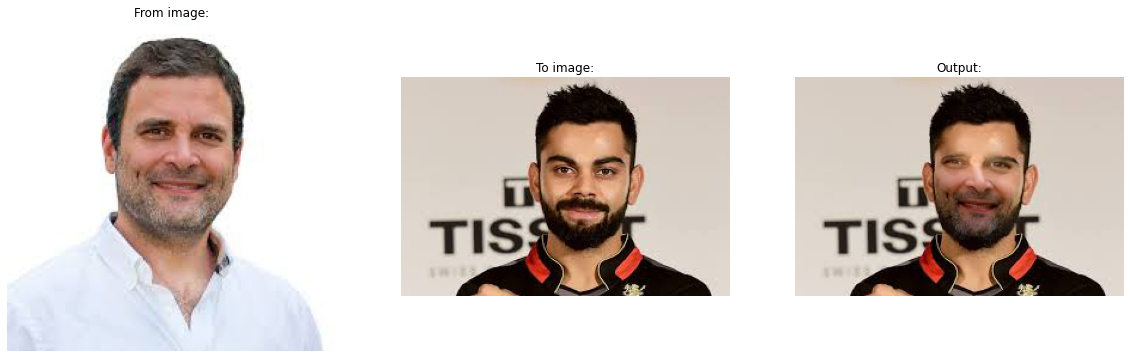

In [14]:
#@title Display input images and output

im1 = read_url_or_local_image(from_image, im_format = 'pil')
im2 = read_url_or_local_image(to_image, im_format = 'pil')
    
out = Image.open(output_filename)

plt.figure(figsize = (20,10))
plt.subplot(131); plt.imshow(im1); plt.title('From image:'); plt.axis('off');
plt.subplot(132); plt.imshow(im2); plt.title('To image:'); plt.axis('off');
plt.subplot(133); plt.imshow(out); plt.title('Output:'); plt.axis('off');

# Run code step-by-step

In [15]:
# Import modules
import sys, cv2, dlib, time
import numpy as np
import faceBlendCommon as fbc
import matplotlib.pyplot as plt

In [16]:
# Read images
img1 = read_url_or_local_image(from_image)
img2 = read_url_or_local_image(to_image)

im1Display = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
im2Display = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1Warped = np.copy(img2)

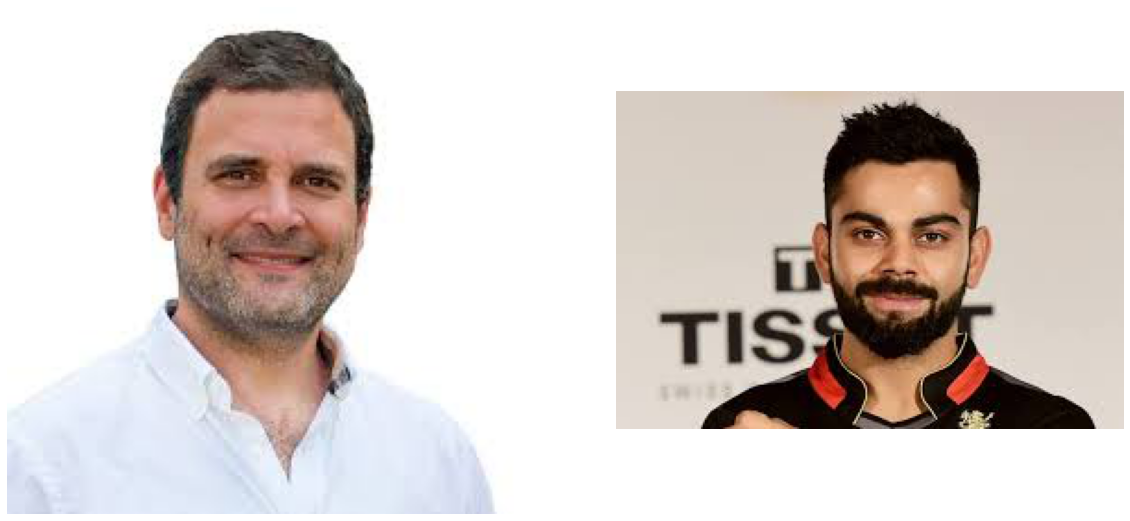

In [17]:
# Display Images 
plt.figure(figsize = (20,10))
plt.subplot(121); plt.imshow(im1Display); plt.axis('off');
plt.subplot(122); plt.imshow(im2Display); plt.axis('off');

## Landmark Detector using Dlib

In [18]:
# Initialize the dlib facial landmakr detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# Read array of corresponding points
points1 = fbc.getLandmarks(detector, predictor, img1)
points2 = fbc.getLandmarks(detector, predictor, img2)

### Display Landmarks

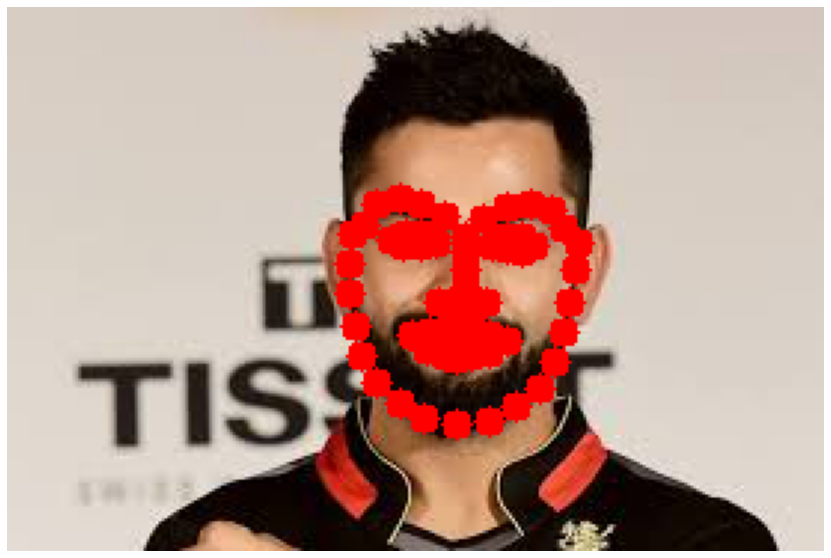

In [19]:
imTemp = im2Display.copy()
for p in points2:
    cv2.circle(imTemp, p, 5, (255,0,0), -1)

plt.figure(figsize = (20,10)); plt.imshow(imTemp); plt.axis('off');

## Find convex hull

In [20]:
# Find convex hull
hullIndex = cv2.convexHull(np.array(points2).astype(np.int32), returnPoints=False) # add .astype(np.int32) to fix TypeError: data type = 9 not supported

# Create convex hull lists
hull1 = []
hull2 = []
for i in range(0, len(hullIndex)):
    hull1.append(points1[hullIndex[i][0]])
    hull2.append(points2[hullIndex[i][0]])

## Display convex hull

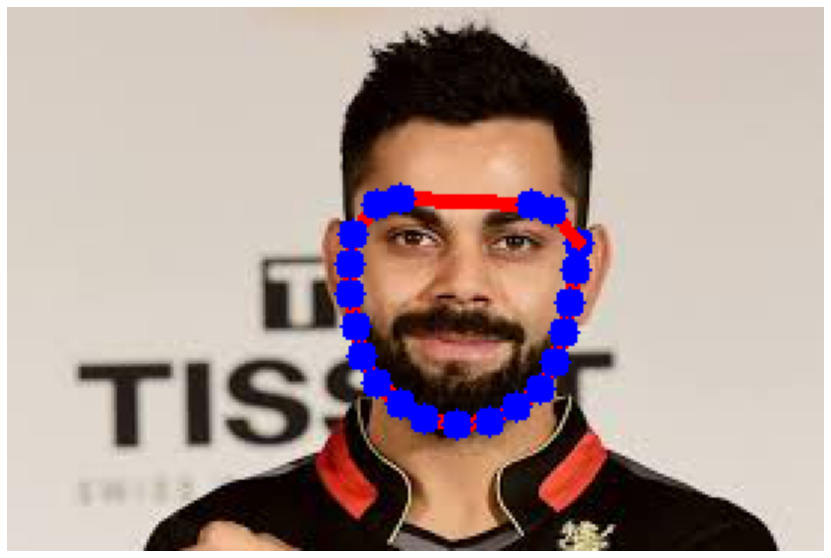

In [21]:
imTemp = im2Display.copy()
numPoints = len(hull2)
for i in range(0, numPoints):
    cv2.line(imTemp, hull2[i], hull2[(i+1)%numPoints], (255,0,0), 3)
    cv2.circle(imTemp, hull2[i], 5, (0,0,255), -1)
plt.figure(figsize = (20,10)); plt.imshow(imTemp); plt.axis('off');

## Calculate Mask

In [22]:
# Calculate Mask for Seamless cloning
hull8U = []
for i in range(0, len(hull2)):
    hull8U.append((hull2[i][0], hull2[i][1]))

mask = np.zeros(img2.shape, dtype=img2.dtype) 
cv2.fillConvexPoly(mask, np.int32(hull8U), (255, 255, 255))

# Find Centroid
m = cv2.moments(mask[:,:,1])
center = (int(m['m10']/m['m00']), int(m['m01']/m['m00']))

## Display Mask

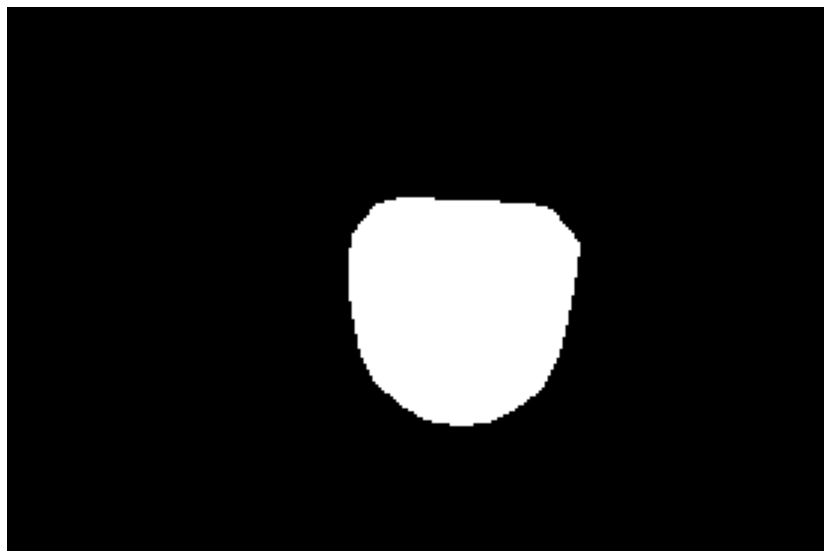

In [23]:
plt.figure(figsize = (20,10)); plt.imshow(mask); plt.axis('off');

## Calculate Delaunay Triangles

In [24]:
# Find Delaunay traingulation for convex hull points
sizeImg2 = img2.shape    
rect = (0, 0, sizeImg2[1], sizeImg2[0])

dt = fbc.calculateDelaunayTriangles(rect, hull2)

# If no Delaunay Triangles were found, quit
if len(dt) == 0:
    quit()

## Display Triangulation

In [25]:
imTemp1 = im1Display.copy()
imTemp2 = im2Display.copy()

tris1 = []
tris2 = []
for i in range(0, len(dt)):
    tri1 = []
    tri2 = []
    for j in range(0, 3):
        tri1.append(hull1[dt[i][j]])
        tri2.append(hull2[dt[i][j]])

    tris1.append(tri1)
    tris2.append(tri2)

cv2.polylines(imTemp1,np.array(tris1).astype(np.int32),True,(0,0,255),2);
cv2.polylines(imTemp2,np.array(tris2).astype(np.int32),True,(0,0,255),2);

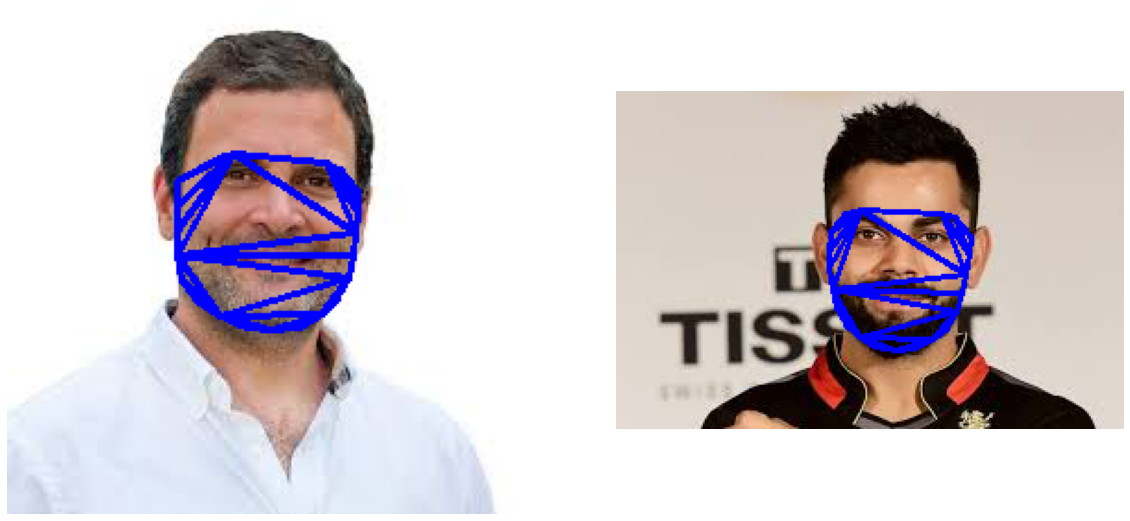

In [26]:
plt.figure(figsize = (20,10)); 
plt.subplot(121); plt.imshow(imTemp1); plt.axis('off');
plt.subplot(122); plt.imshow(imTemp2); plt.axis('off');

## Simple Alpha Blending

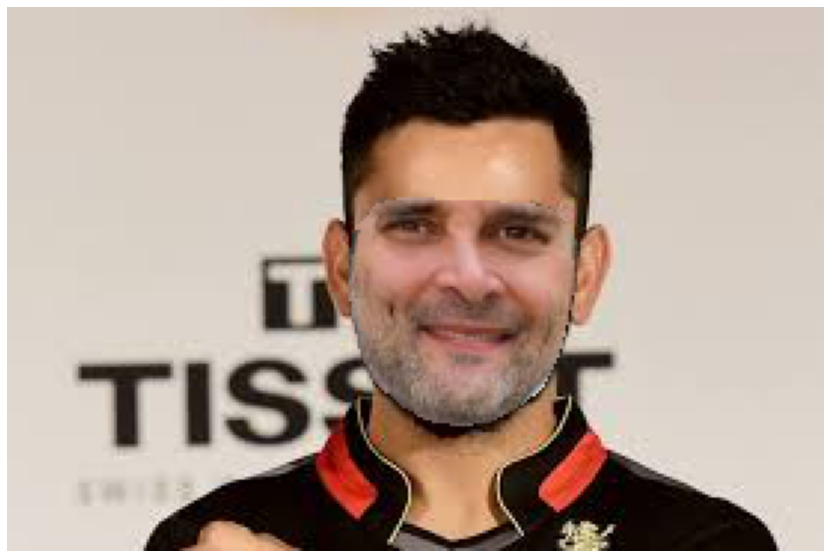

In [27]:
# Apply affine transformation to Delaunay triangles
for i in range(0, len(tris1)):
    fbc.warpTriangle(img1, img1Warped, tris1[i], tris2[i])

plt.figure(figsize=(20,10));
plt.imshow(np.uint8(img1Warped)[:,:,::-1]); plt.axis('off');

## Seamless Cloning using OpenCV

In [28]:
# Clone seamlessly.
output = cv2.seamlessClone(np.uint8(img1Warped), img2, mask, center, cv2.NORMAL_CLONE)

## Display Results

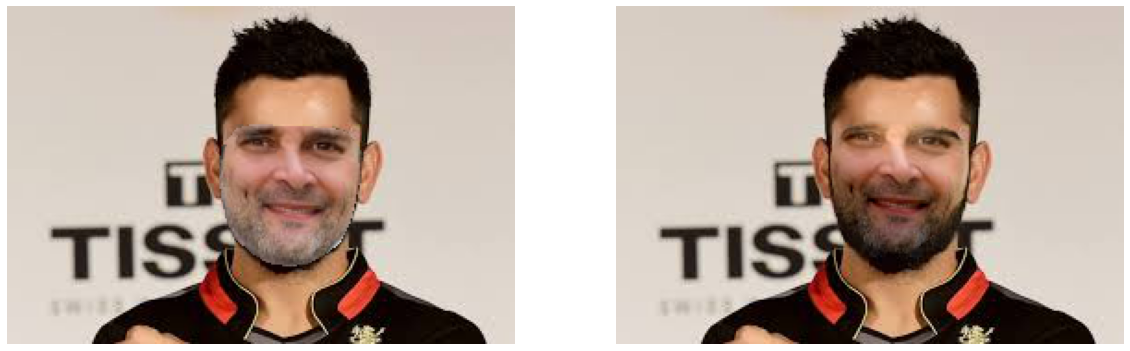

In [29]:
plt.figure(figsize=(20,10))
plt.subplot((121)); plt.imshow(np.uint8(img1Warped)[:,:,::-1]); plt.axis('off');
plt.subplot((122)); plt.imshow(output[:,:,::-1]); plt.axis('off');